In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Load the dataset
data = pd.read_csv('cleaned_reviews.csv')  # Replace with actual file path

# Display the first few rows
print(data.head())


  sentiments                                     cleaned_review  \
0   positive  i wish would have gotten one earlier love it a...   
1    neutral  i ve learned this lesson again open the packag...   
2    neutral          it is so slow and lags find better option   
3    neutral  roller ball stopped working within months of m...   
4    neutral  i like the color and size but it few days out ...   

   cleaned_review_length  review_score  
0                     19           5.0  
1                     88           1.0  
2                      9           2.0  
3                     12           1.0  
4                     21           1.0  


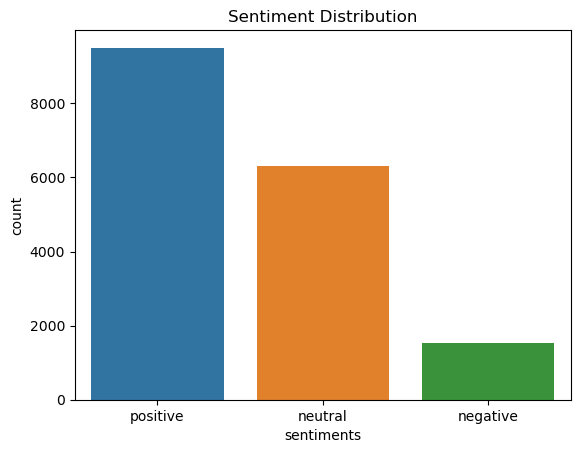

In [3]:
# Plot sentiment distribution
sns.countplot(data=data, x='sentiments')
plt.title("Sentiment Distribution")
plt.show()


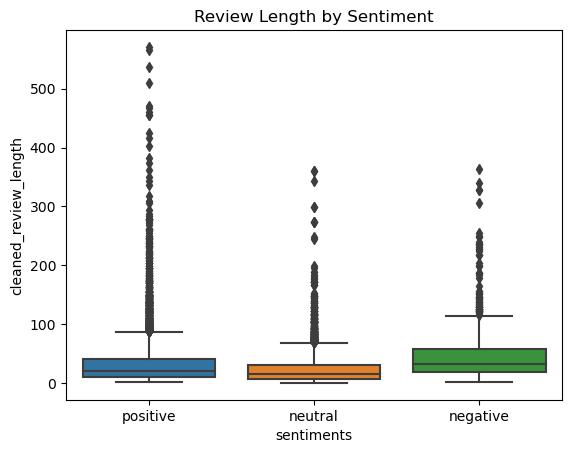

In [4]:
# Boxplot of review length by sentiment
sns.boxplot(x='sentiments', y='cleaned_review_length', data=data)
plt.title("Review Length by Sentiment")
plt.show()


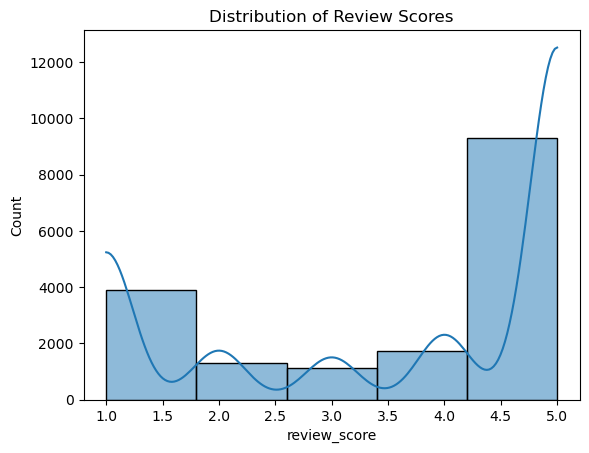

In [5]:
sns.histplot(data['review_score'], bins=5, kde=True)
plt.title("Distribution of Review Scores")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('cleaned_reviews.csv')

# Fill NaN values in the 'cleaned_review' column with an empty string to avoid errors during vectorization
data['cleaned_review'] = data['cleaned_review'].fillna('')

# Vectorize the review text using CountVectorizer
vectorizer = CountVectorizer(max_features=500, stop_words='english')
X_text = vectorizer.fit_transform(data['cleaned_review']).toarray()

# Combine text features with review length feature
X = np.concatenate((X_text, data[['cleaned_review_length']].values), axis=1)

# Map sentiments to numeric values
y = data['sentiments'].map({'positive': 2, 'neutral': 1, 'negative': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Test the model accuracy
y_pred = model.predict(X_test)
print("Model accuracy:", accuracy_score(y_test, y_pred))

# Interactive part: Ask for a user input and predict sentiment
user_review = input("Enter a review: ")
user_review_length = len(user_review.split())  # Calculate the word count for user input

# Vectorize the user's input and combine with review length
user_review_vector = vectorizer.transform([user_review]).toarray()
user_input = np.concatenate((user_review_vector, np.array([[user_review_length]])), axis=1)

# Predict sentiment for the user's review
predicted_sentiment = model.predict(user_input)

# Map the predicted sentiment back to the sentiment labels
sentiment_mapping = {2: 'positive', 1: 'neutral', 0: 'negative'}
print("Predicted sentiment:", sentiment_mapping[predicted_sentiment[0]])


Model accuracy: 0.7024221453287197
